In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [ ]:
data = pd.read_excel('Data2021_3.xlsx')
data.head()

,Unnamed: 0,A_AGE,A_HGA,A_MARITL,A_FAMREL,A_SEX,P_STAT,PECERT1,PECERT2,PECERT3,A_HRSPAY,A_HRLYWK,A_WKSTAT,CLWK,EARNER,PHMEMPRS,ERN_SRCE,CAP_VAL,WSAL_YN,FILESTAT,TAX_INC,A_CLSWKR,A_FAMREL.1,PRDTRACE,A_SEX.1,CAP_VAL.1,A_USLHRS,PRCITSHP,PTOT_R
0,0,56,39,1,1,2,1,2,-1,-1,-1,0,1,5,2,0,0,0,2,1,0,0,1,1,2,0,-1,1,1
1,1,57,39,1,2,1,1,2,-1,-1,-1,0,6,1,1,1,1,0,1,1,0,1,2,1,1,0,-1,1,6
2,2,78,39,4,4,2,1,2,-1,-1,-1,0,1,5,2,0,0,0,2,5,0,0,4,1,2,0,-1,1,6
3,3,65,43,1,1,2,1,2,-1,-1,-1,2,2,1,1,1,1,0,1,3,53419,1,1,1,2,0,40,1,19
4,4,66,39,1,2,1,1,1,1,1,-1,2,2,1,1,1,1,0,1,3,0,1,2,1,1,0,40,1,14


In [ ]:
data1 = data.copy()

In [ ]:
data1['PTOT_R'] = np.where(np.logical_and(data1['PTOT_R'] >=0,data1['PTOT_R'] <17) , 1, data1['PTOT_R'])
data1['PTOT_R'] = np.where(np.logical_and(data1['PTOT_R'] >=17,data1['PTOT_R'] <26) , 2, data1['PTOT_R'])
data1['PTOT_R'] = np.where(data1['PTOT_R'] >=26, 3, data1['PTOT_R'])

In [ ]:
data1['A_AGE'] = np.where(data1['A_AGE'] < 18 , 1, data1['A_AGE'])
data1['A_AGE'] = np.where(np.logical_and(data1['A_AGE'] >= 18,data1['A_AGE']<30),2,data1['A_AGE'])
data1['A_AGE'] = np.where(np.logical_and(data1['A_AGE'] >= 30,data1['A_AGE']<50),3,data1['A_AGE'])
data1['A_AGE'] = np.where(data1['A_AGE'] >= 50,4,data1['A_AGE'])

In [ ]:
data1['A_HGA'] = np.where(data1['A_HGA'] > 0, data1['A_HGA']-30, data1['A_HGA'])

In [ ]:
data1['A_HRSPAY'] = np.where(data1['A_HRSPAY'] > 0 ,data1['A_HRSPAY']/100 , data1['A_HRSPAY'])
data1['A_HRSPAY'] = np.where(data1['A_HRSPAY'] < 0 ,0 , data1['A_HRSPAY'])

In [ ]:
data1['PECERT1'] = np.where(data1['PECERT1'] < 0 ,0 , data1['PECERT1'])
data1['PECERT2'] = np.where(data1['PECERT2'] < 0 ,0 , data1['PECERT2'])
data1['PECERT3'] = np.where(data1['PECERT3'] < 0 ,0 , data1['PECERT3'])

In [ ]:
data1['A_USLHRS'] = np.where(data1['A_USLHRS'] == -4 , 20 , data1['A_USLHRS'])
data1['A_USLHRS'] = np.where(data1['A_USLHRS'] == -1 , 0 , data1['A_USLHRS'])

In [ ]:
data1 = data1.drop('Unnamed: 0',axis=1)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
X = data1.loc[:, data1.columns != 'PTOT_R']
y = data1.loc[:, data1.columns == 'PTOT_R']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

logreg = KNeighborsClassifier()
rfe = RFE(logreg, n_features_to_select=10)
rfe = rfe.fit(X_train, y_train.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

ValueError: ignored

In [ ]:
cols = X.columns
new_cols = []
for i,j in enumerate(rfe.ranking_):
  if(j<2):
    new_cols.append(cols[i])
  else:
    print(cols[i])
X = X[new_cols]
print(X)
print(new_cols)

In [ ]:
from sklearn.preprocessing import StandardScaler

X = data1.loc[:, data1.columns != 'PTOT_R']
y = data1.loc[:, data1.columns == 'PTOT_R']
# cols = ['A_AGE', 'A_HGA', 'A_SEX', 'P_STAT', 'PECERT1', 'PECERT3', 'A_HRLYWK', 'A_WKSTAT', 'CLWK', 'EARNER', 'PHMEMPRS', 'ERN_SRCE', 'WSAL_YN', 'A_FAMREL.1', 'A_SEX.1']
# X = X[cols]
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#columns = X_train.columns

In [ ]:
from sklearn.metrics import accuracy_score
arr = []
for i in range(1,101):
  knn_clf=KNeighborsClassifier(n_neighbors=i)
  knn_clf.fit(X_train,y_train)
  ypred=knn_clf.predict(X_test)
  result2 = accuracy_score(y_test,ypred)
  print(str(i)+ " " + str(result2))
  arr.append(result2)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


1 0.7713333333333333


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


2 0.7786666666666666


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


3 0.79025


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


4 0.7947083333333333


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


5 0.7933333333333333


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


6 0.800625


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


7 0.8006666666666666


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


8 0.801375


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


9 0.802625


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


10 0.8044166666666667


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


11 0.8046666666666666


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


12 0.803875


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


13 0.8044583333333334


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


14 0.8035833333333333


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


15 0.804625


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


16 0.8027083333333334


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


17 0.8039583333333333


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


18 0.805


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


19 0.803875


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


20 0.803125


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


21 0.80375


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


22 0.8027083333333334


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


23 0.802125


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


24 0.8021666666666667


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


25 0.8019583333333333


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


26 0.8025833333333333


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KeyboardInterrupt: ignored

In [ ]:
knn_clf=KNeighborsClassifier(n_neighbors=34)
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test)
result2 = accuracy_score(y_test,ypred)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, ypred)
print('Confusion Matrix:')
print(result)
result1 = classification_report(y_test, ypred)
print('Classification Report:',)
print (result1)
result2 = accuracy_score(y_test,ypred)
print('Accuracy:',result2)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Confusion Matrix:
[[14872   514   484]
 [ 1462   888   943]
 [  769   543  3525]]
Classification Report:
              precision    recall  f1-score   support

           1       0.87      0.94      0.90     15870
           2       0.46      0.27      0.34      3293
           3       0.71      0.73      0.72      4837

    accuracy                           0.80     24000
   macro avg       0.68      0.65      0.65     24000
weighted avg       0.78      0.80      0.79     24000

Accuracy: 0.8035416666666667


In [ ]:
data1

,A_AGE,A_HGA,A_MARITL,A_FAMREL,A_SEX,P_STAT,PECERT1,PECERT2,PECERT3,A_HRSPAY,A_HRLYWK,A_WKSTAT,CLWK,EARNER,PHMEMPRS,ERN_SRCE,CAP_VAL,WSAL_YN,FILESTAT,A_CLSWKR,A_FAMREL.1,PRDTRACE,A_SEX.1,CAP_VAL.1,A_USLHRS,PRCITSHP,PTOT_R
0,4,12,7,0,1,1,1,1,0,0.0,0,1,5,2,0,0,0,2,5,0,0,1,1,0,0,1,2
1,3,11,1,1,1,1,2,0,0,0.0,0,5,1,1,2,1,0,1,1,2,1,1,1,0,20,1,1
2,4,14,1,2,2,1,2,0,0,0.0,0,2,1,1,1,1,0,1,1,1,2,1,2,0,40,1,3
3,1,0,7,3,1,3,0,0,0,0.0,0,0,0,0,0,0,0,0,6,0,3,1,1,0,0,1,1
4,1,0,7,3,2,3,0,0,0,0.0,0,0,0,0,0,0,0,0,6,0,3,2,2,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,2,10,7,3,1,1,2,0,0,0.0,0,4,1,1,2,1,0,1,5,1,3,2,1,0,20,1,1
79996,2,10,7,3,2,1,2,0,0,0.0,0,4,1,1,1,1,0,1,6,1,3,2,2,0,20,1,1
79997,1,0,7,3,2,3,0,0,0,0.0,0,0,0,0,0,0,0,0,6,0,3,2,2,0,0,1,1
79998,4,9,5,1,2,1,2,0,0,0.0,0,6,1,1,2,1,0,1,5,1,1,2,2,0,0,1,1


In [ ]:
arr

[0.716875,
 0.7383333333333333,
 0.7489166666666667,
 0.7597083333333333,
 0.7612083333333334,
 0.760875,
 0.7634583333333333,
 0.7646666666666667,
 0.7657083333333333,
 0.767125,
 0.7675,
 0.7697083333333333,
 0.7694166666666666,
 0.77125,
 0.772125,
 0.7707083333333333,
 0.7722916666666667,
 0.7722916666666667,
 0.772875,
 0.772875,
 0.775125,
 0.77475,
 0.775125,
 0.775125,
 0.7749583333333333,
 0.77525,
 0.776375,
 0.7759166666666667,
 0.7765416666666667,
 0.7775833333333333,
 0.77575,
 0.7769166666666667,
 0.7765,
 0.7783333333333333,
 0.777375,
 0.77775,
 0.7774583333333334,
 0.7762916666666667,
 0.7762083333333333,
 0.7764166666666666,
 0.77575,
 0.7762916666666667,
 0.777125,
 0.7767916666666667,
 0.7766666666666666,
 0.7762083333333333,
 0.7775833333333333,
 0.7774583333333334,
 0.7771666666666667]

Text(0, 0.5, 'Accuracy')

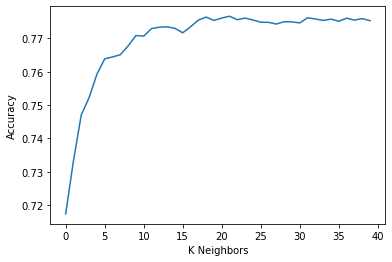

In [ ]:
plt.plot(arr)
plt.xlabel("K Neighbors")
plt.ylabel("Accuracy")